In [1]:
import sys,os
sys.path.append(os.path.abspath('../'))
from modules import eval_ps as eval_ps
%pylab notebook
import collections
from modules import auto_doppler_cov as adc
from modules import cross_doppler_cov as cdc

Populating the interactive namespace from numpy and matplotlib


In [2]:
fct=eval_ps.ska_spectroscopic_doppler_forecast()
fct.init_camb(lmax=1024,limber_phi_lmin=300)
fct.setup_window_functions(normalize=False,nzbin=3,z_olap=0.0,taper_width=0.05)
# fct.setup_radial_res()

<IPython.core.display.Javascript object>


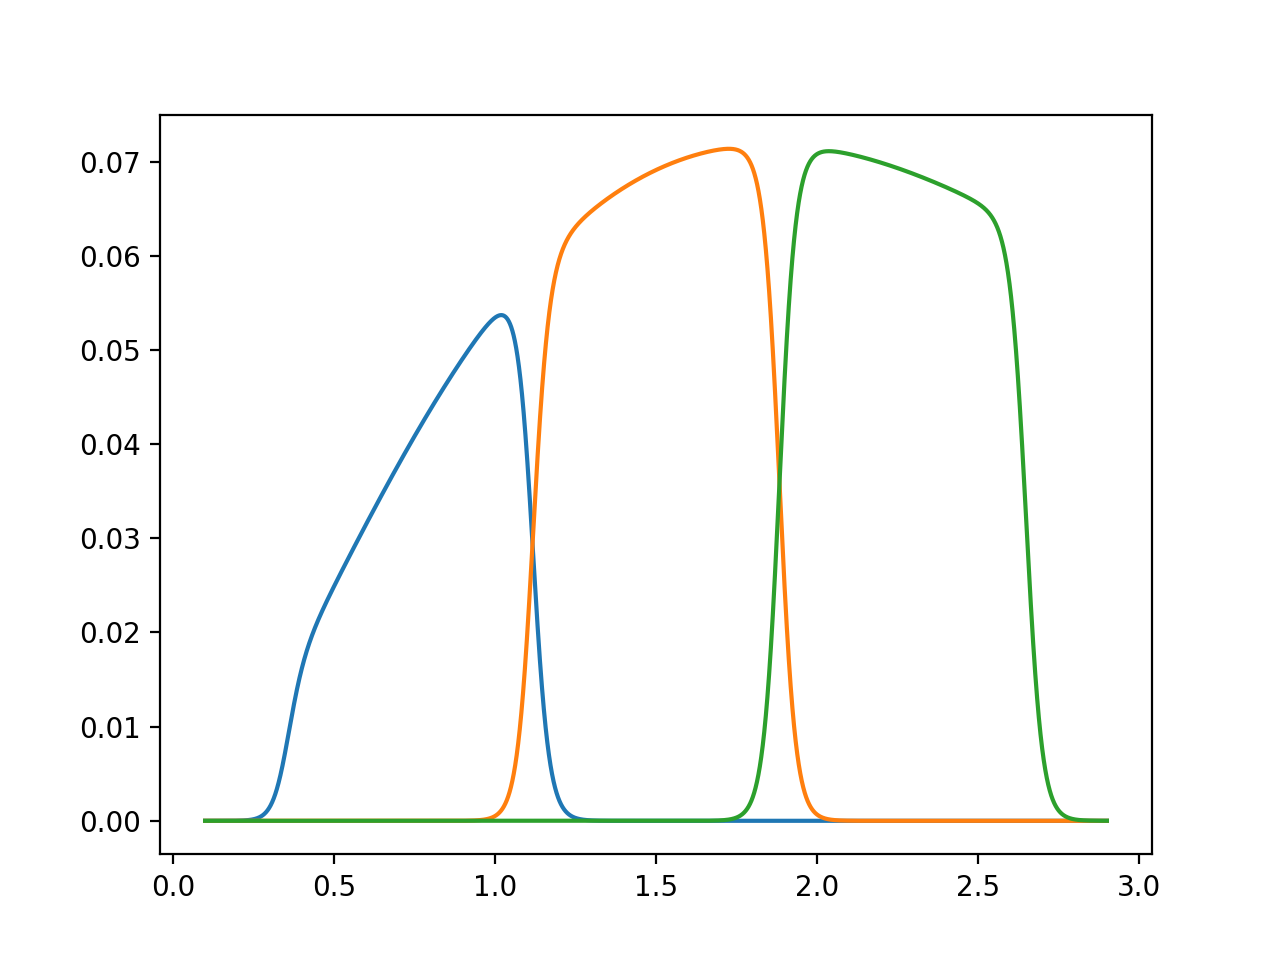

In [3]:
figure()
for zp in fct.z_centroid:
    plot(fct.z,fct.window[zp])
    
# figure()
# for zp in fct.z_centroid:
#     plot(fct.z,fct.dwindow[zp])
    
# figure()
# plot(fct.z,fct.total_window)
# plot(fct.z,fct.dndz)

In [4]:
fct.return_spectra()

W1xW1 W1xW1
W2xW1 W1xW2
W3xW1 W1xW3
W4xW1 W1xW4
W5xW1 W1xW5
W6xW1 W1xW6
W2xW3 W3xW2
W3xW3 W3xW3
W4xW3 W3xW4
W5xW3 W3xW5
W6xW3 W3xW6
W2xW5 W5xW2
W4xW5 W5xW4
W5xW5 W5xW5
W6xW5 W5xW6


<IPython.core.display.Javascript object>


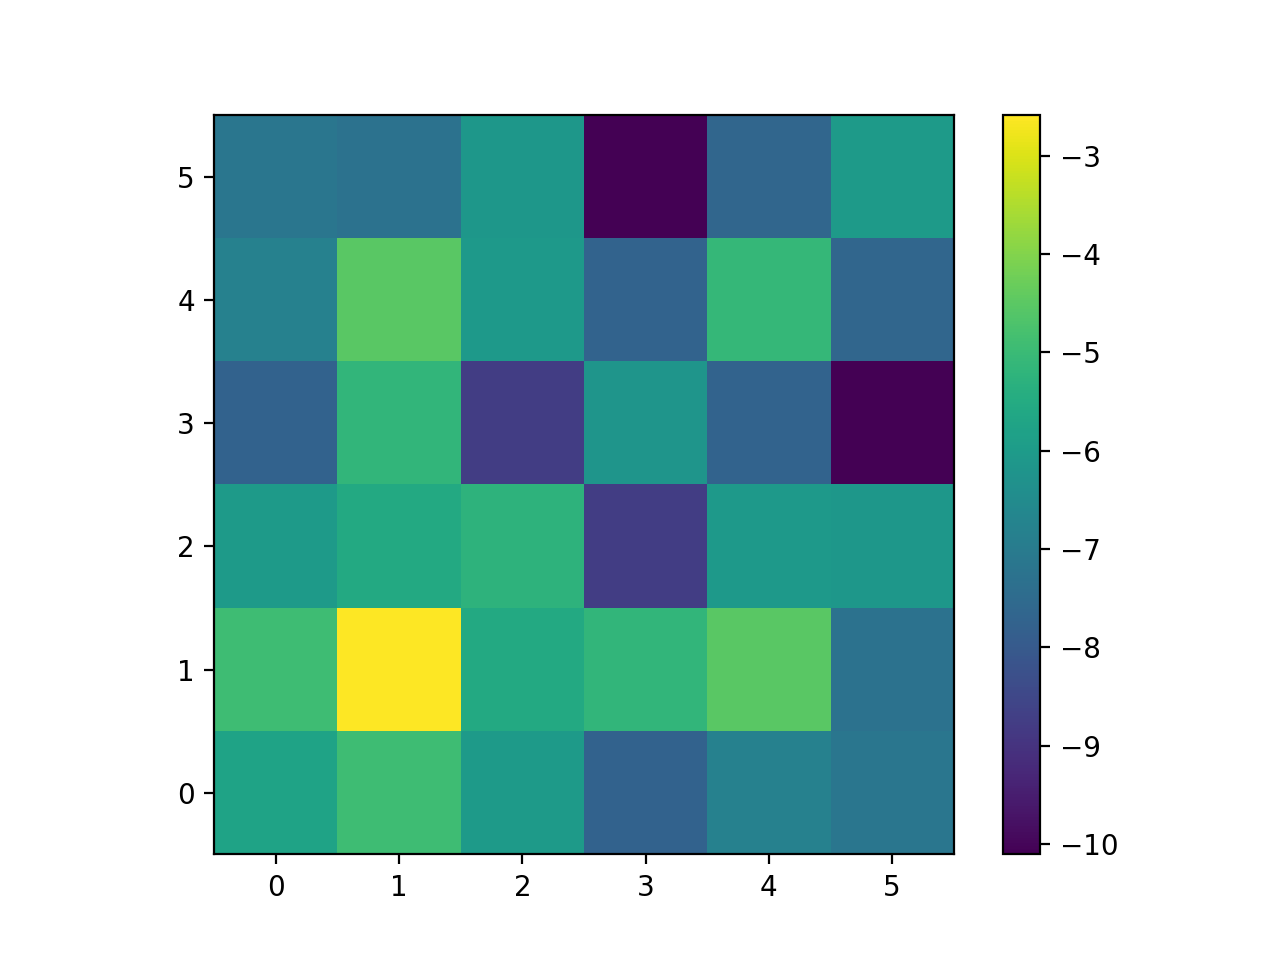

In [5]:
fct.evaluate_covariance_mat()
figure()
imshow(log10(abs(fct.cov_mat)),origin="lower")
colorbar()

<IPython.core.display.Javascript object>


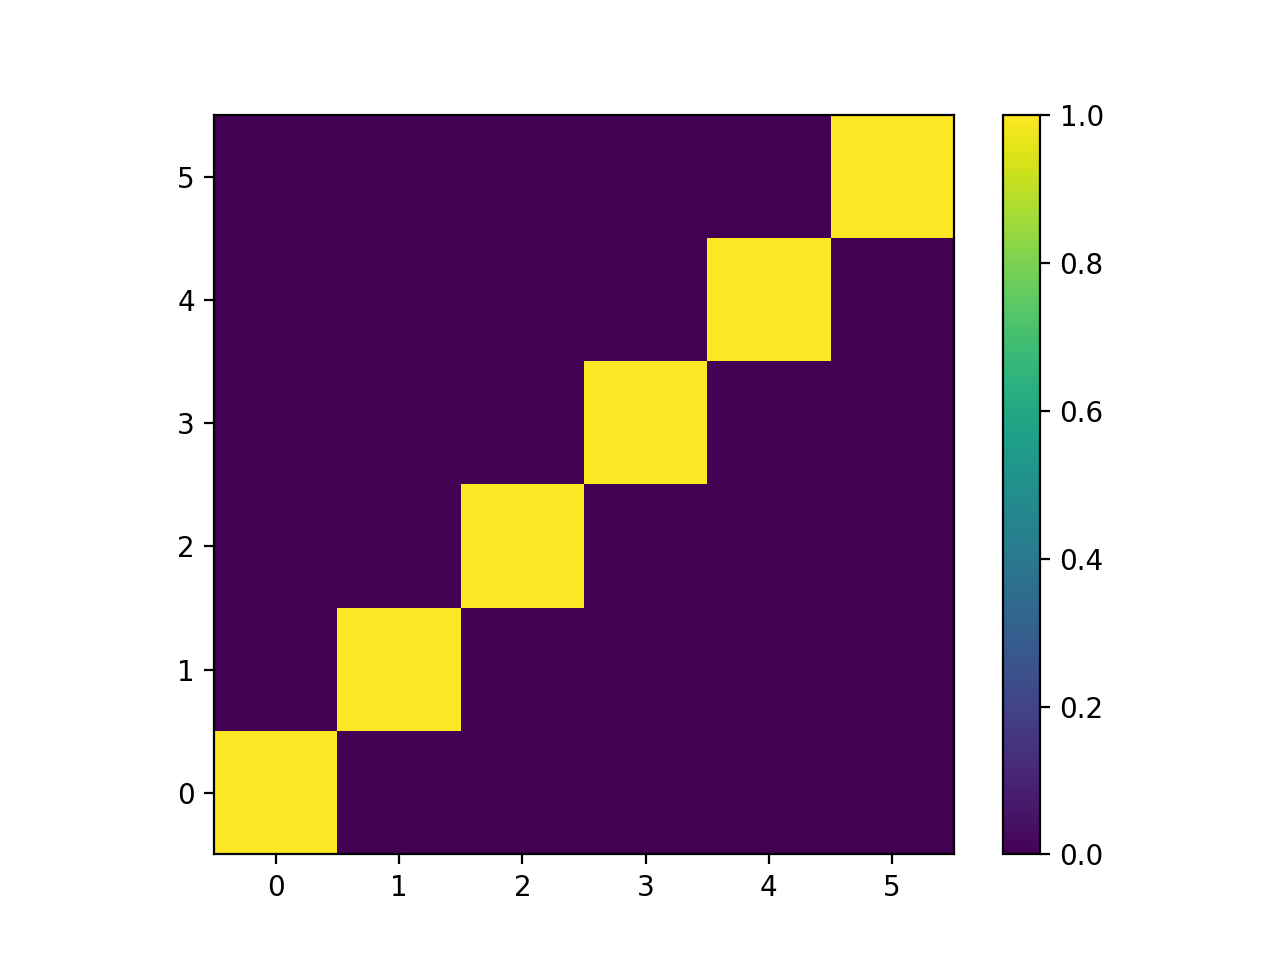

In [6]:
figure()
imshow(np.dot(np.linalg.inv(fct.cov_mat),fct.cov_mat),origin="lower")
colorbar()

In [10]:
fct.cov_diag

array([  7.14996735e-07,   2.71701034e-05,   1.76173833e-05,
         5.18755843e-06,   5.88594659e-06,   6.21003007e-07,
         9.50311205e-06,   8.25513709e-06,   9.79186505e-06,
         3.82605587e-07,   1.02772989e-03,   1.00279265e-05,
         4.69467775e-07,   2.16065358e-05,   4.42920373e-07])

In [19]:
print fct.auto_cov_key1
print fct.auto_cov_key2
print fct.cross_cov_key

['W1xW1', 'W1xW1', 'W1xW1']
['W1xW1', 'W9xW9', 'W1xW9']
['W1xW1', 'W1xW9', 'W1xW9', 'W1xW1']


<IPython.core.display.Javascript object>


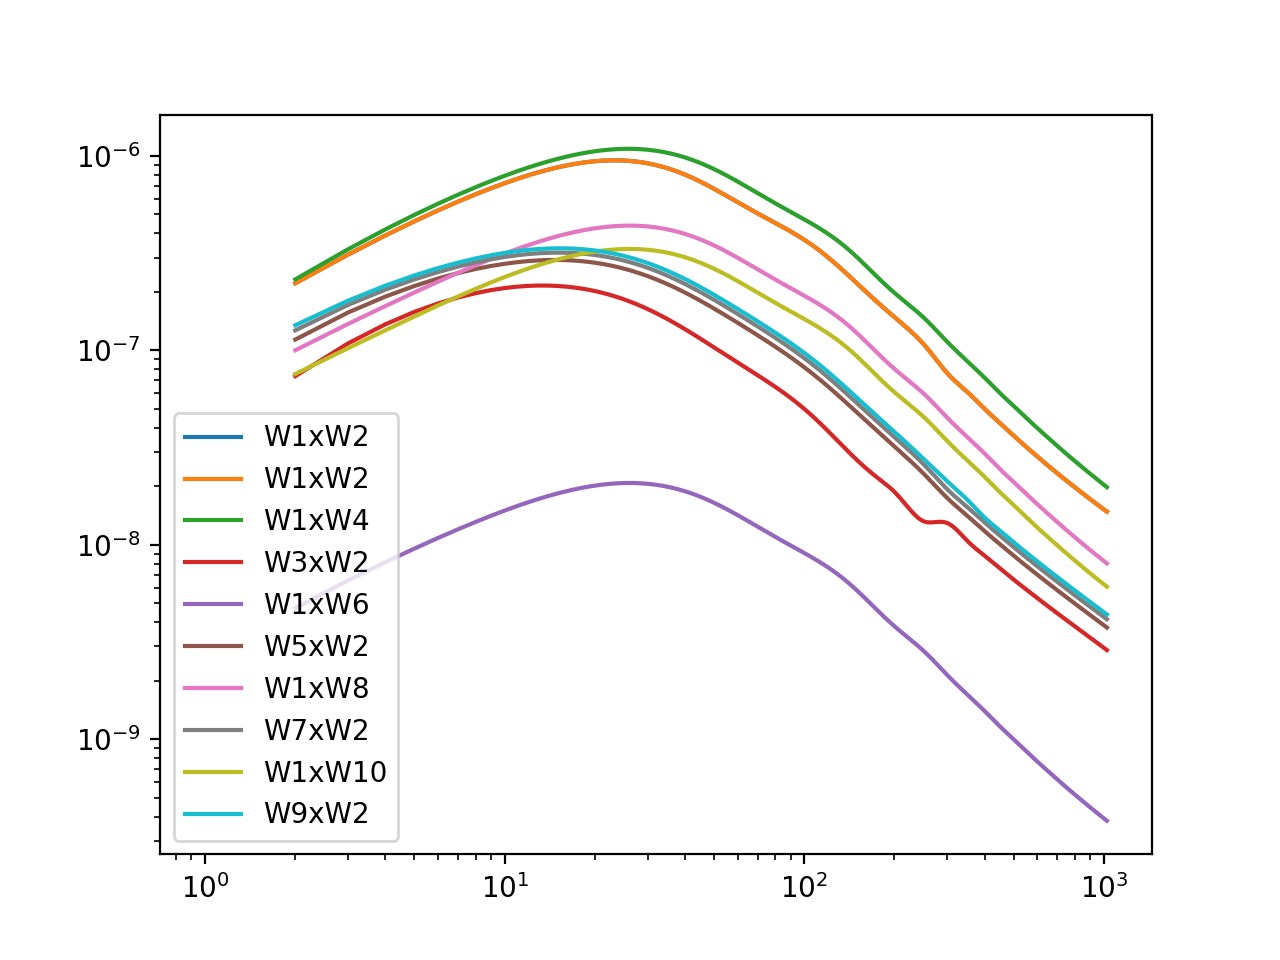

<IPython.core.display.Javascript object>


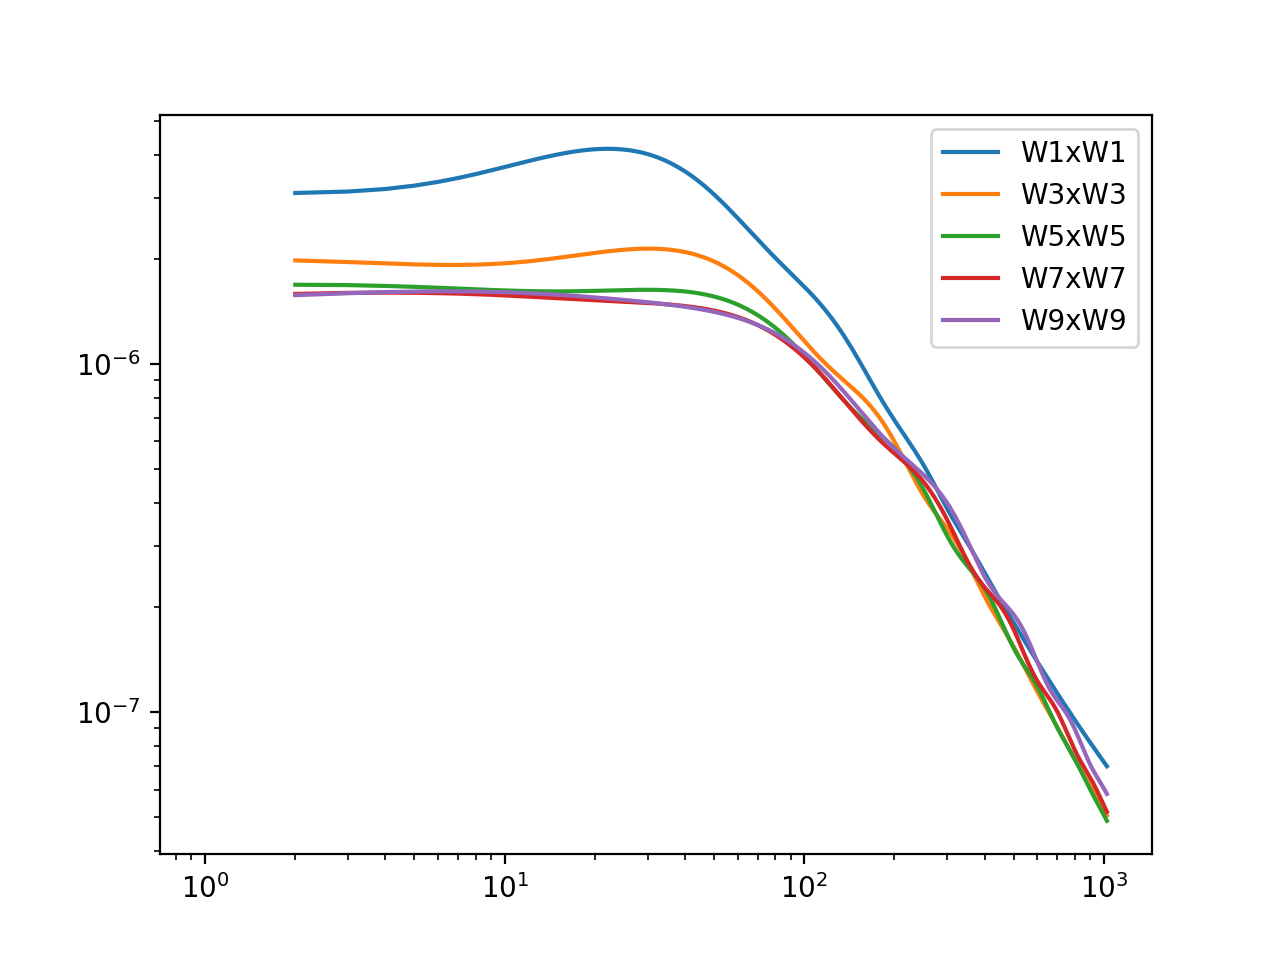

<IPython.core.display.Javascript object>


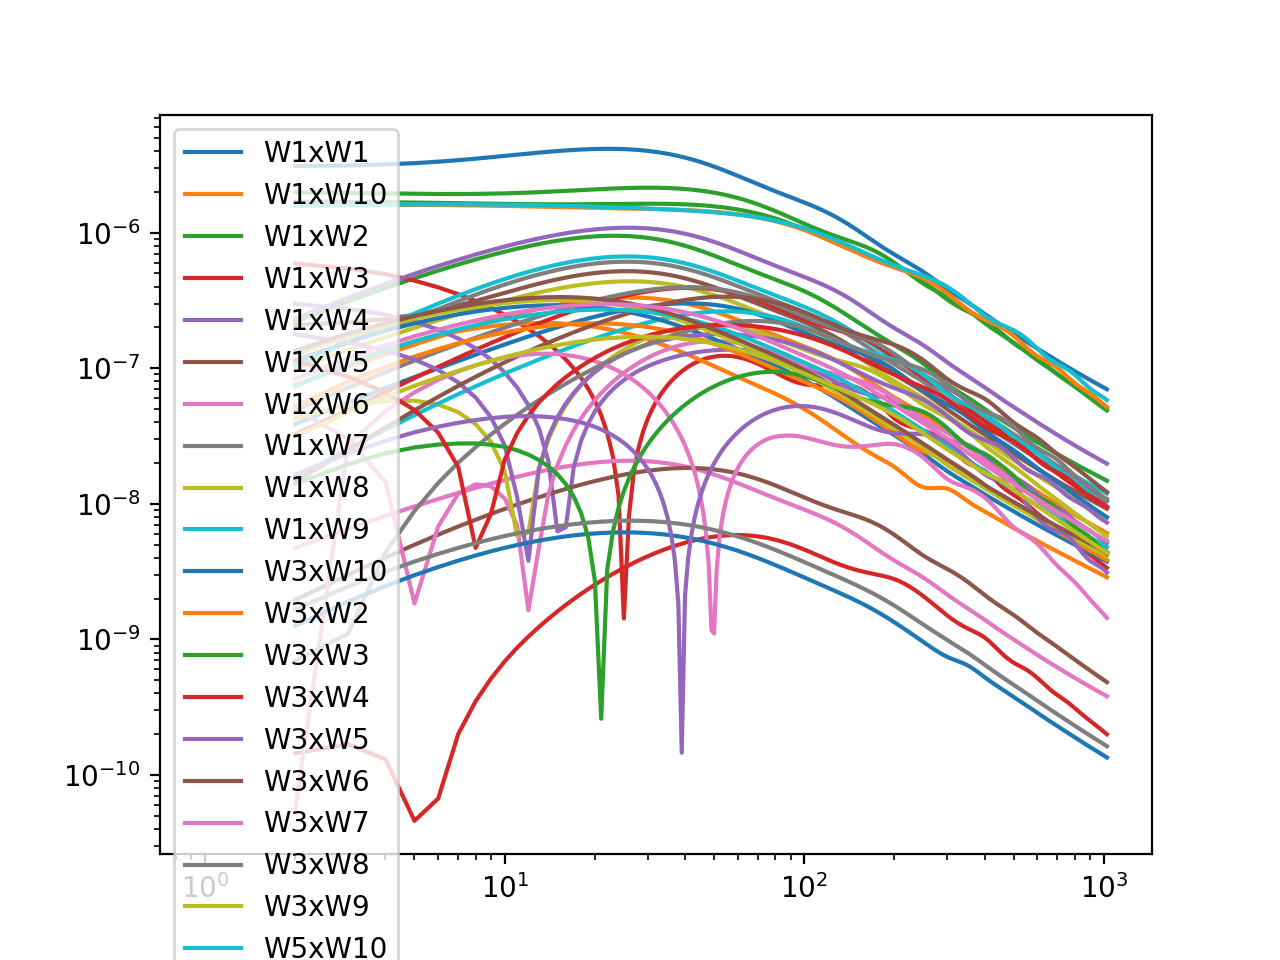

In [5]:
figure()
for key in fct.adr_dg.values()[:5]:
    plot(fct.ell,abs(fct.cls[key[0]]),label=key[0])
    plot(fct.ell,abs(fct.cls[key[1]]),label=key[1])
loglog()
legend(loc=0)

figure()
for key in fct.adr_auto.values():
    plot(fct.ell,abs(fct.cls[key]),label=key)
loglog()
legend(loc=0)

figure()
for key in fct.adr_all_spec:
    plot(fct.ell,abs(fct.cls[key]),label=key)
loglog()
legend(loc=0)

<IPython.core.display.Javascript object>


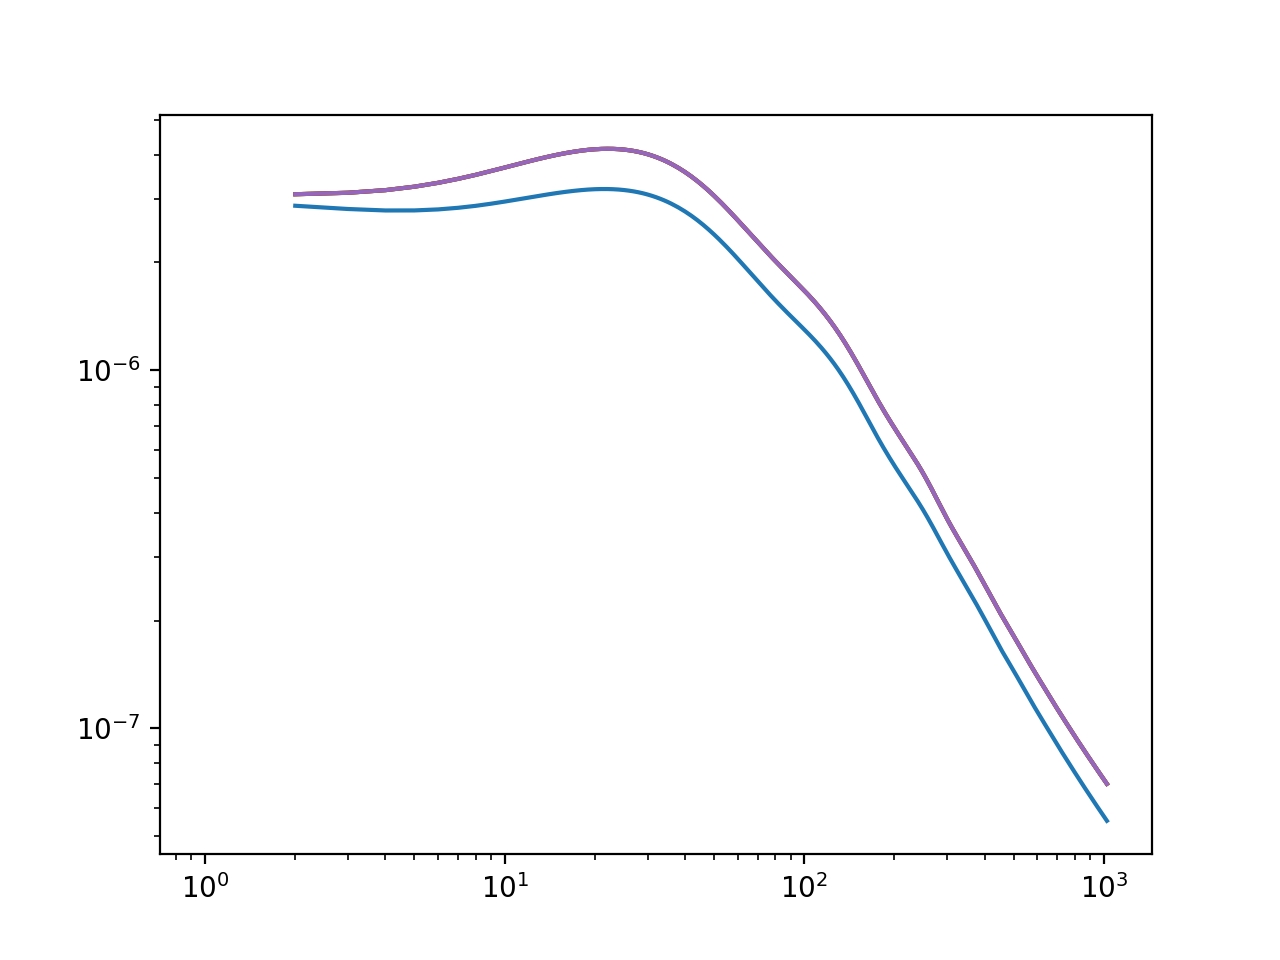

<IPython.core.display.Javascript object>


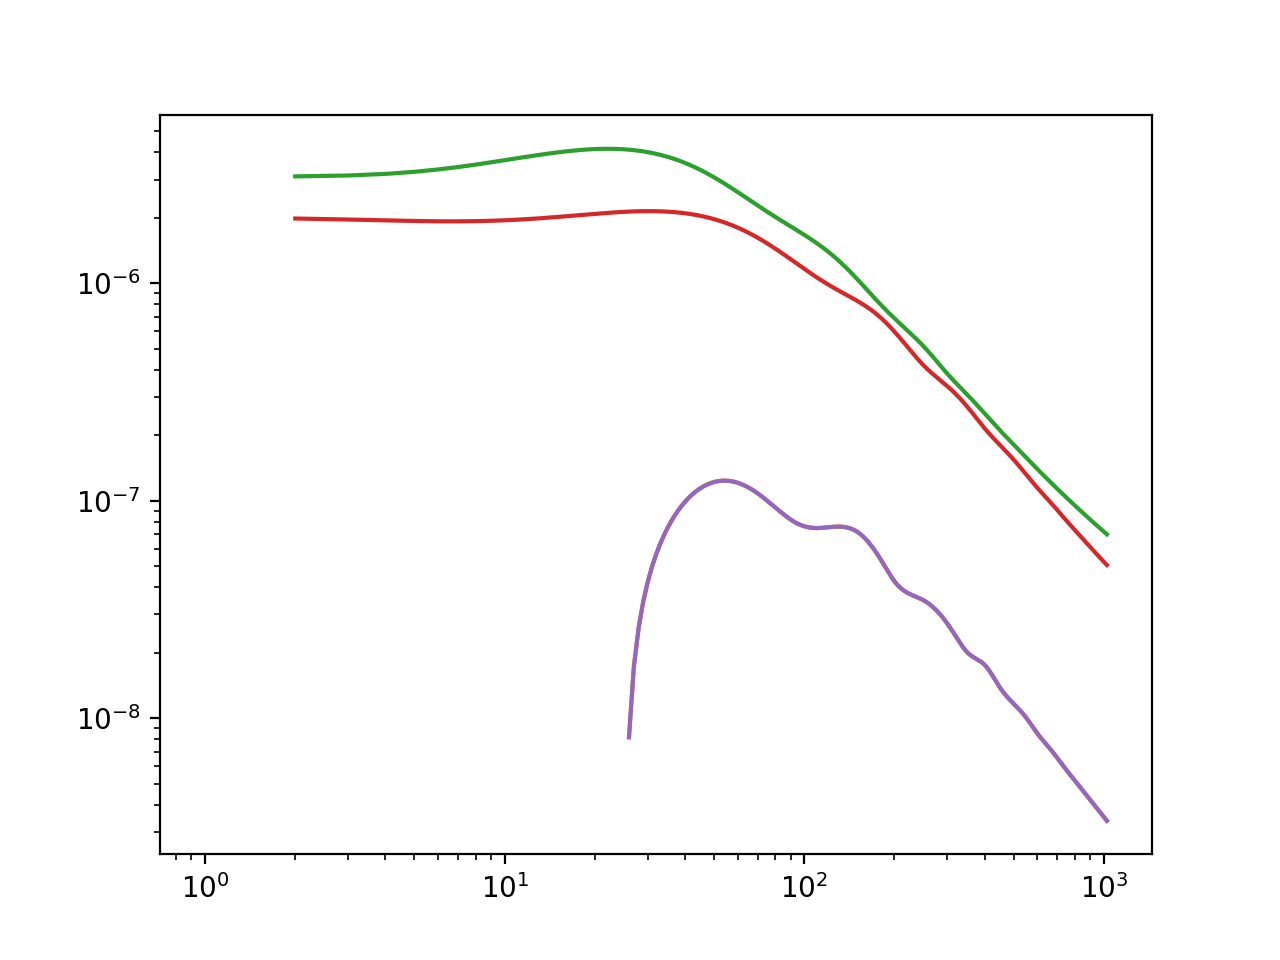

<IPython.core.display.Javascript object>


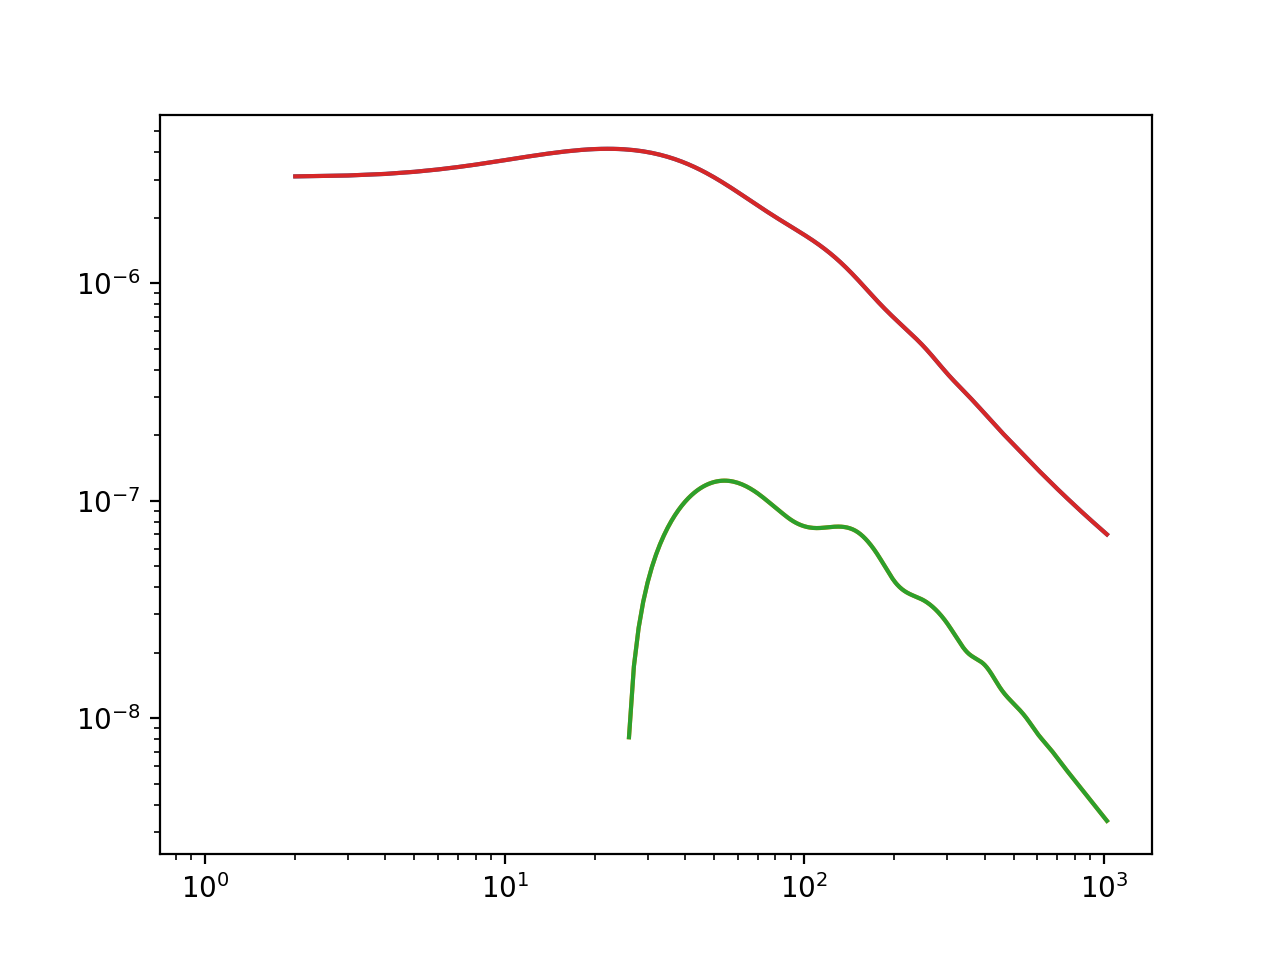

[]

In [11]:
fct.return_cls_for_estimators(0,1)

figure()
for i in range(5):
    plot(fct.ell,fct.cl_est1[i,:])
loglog()

figure()
for i in range(5):
    plot(fct.ell,fct.cl_est2[i,:])
loglog()

figure()
for i in range(4):
    plot(fct.ell,fct.cl_cross[i,:])
loglog()

In [7]:
adc.auto_doppler_forecast(cl=fct.cl_est1,bnu=3,dw=1,lmax=fct.lmax)

9.503112054721264e-06

In [9]:
cdc.cross_doppler_forecast(cl1=fct.cl_est1,cl2=fct.cl_est1,clc=fct.cl_est1[1:,:],bnu=3,dw=1,lmax=fct.lmax)*16

6.131107754739693e-05

In [62]:
i=1
key=fct.adr_d1d2[i] 
w1=key[0:2] ; w2=key[3:] ; auto1_cov_key=[w1+"x"+w1,w2+"x"+w2,w1+"x"+w2]
cl_est1=np.zeros((5,np.size(fct.cls[key])),dtype=np.float64)
cl_est1[0,]=fct.cls[key]-(fct.cls[fct.adr_dg[i][0]]+fct.cls[fct.adr_dg[i][1]])/2.
cl_est1[1,]=fct.cls[key]
for i,ckey in enumerate(auto1_cov_key):
    cl_est1[i+2,:]=fct.cls[ckey] + fct.nl[ckey]
    
j=2
key=fct.adr_d1d2[j] 
w3=key[0:2] ; w4=key[3:] ; auto2_cov_key=[w3+"x"+w3,w4+"x"+w4,w3+"x"+w4]
cl_est2=np.zeros((5,np.size(fct.cls[key])),dtype=np.float64)
cl_est2[0,]=fct.cls[key]-(fct.cls[fct.adr_dg[i][0]]+fct.cls[fct.adr_dg[i][1]])/2.
cl_est2[1,]=fct.cls[key]
for i,ckey in enumerate(auto2_cov_key):
    cl_est2[i+2,:]=fct.cls[ckey] + fct.nl[ckey]

<IPython.core.display.Javascript object>


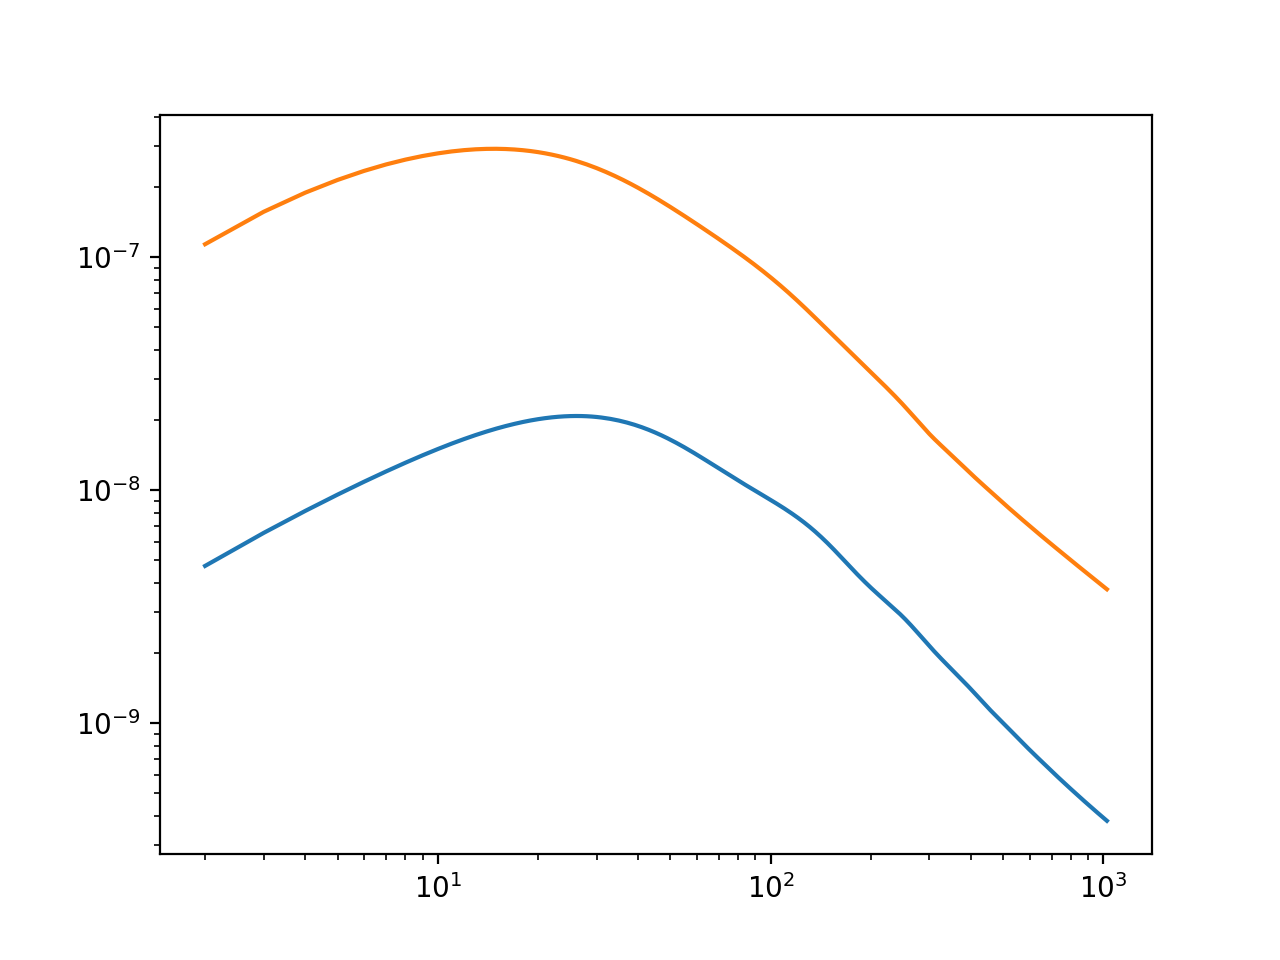

[]

In [68]:
figure()
plot(fct.ell,abs(fct.cls[fct.adr_dg[i][0]][2:fct.lmax+1])*2.*pi/(fct.ell*(fct.ell+1.)))
plot(fct.ell,abs(fct.cls[fct.adr_dg[i][1]][2:fct.lmax+1])*2.*pi/(fct.ell*(fct.ell+1.)))
loglog()

In [64]:
auto2_cov_key

['W1xW1', 'W5xW5', 'W1xW5']

<IPython.core.display.Javascript object>


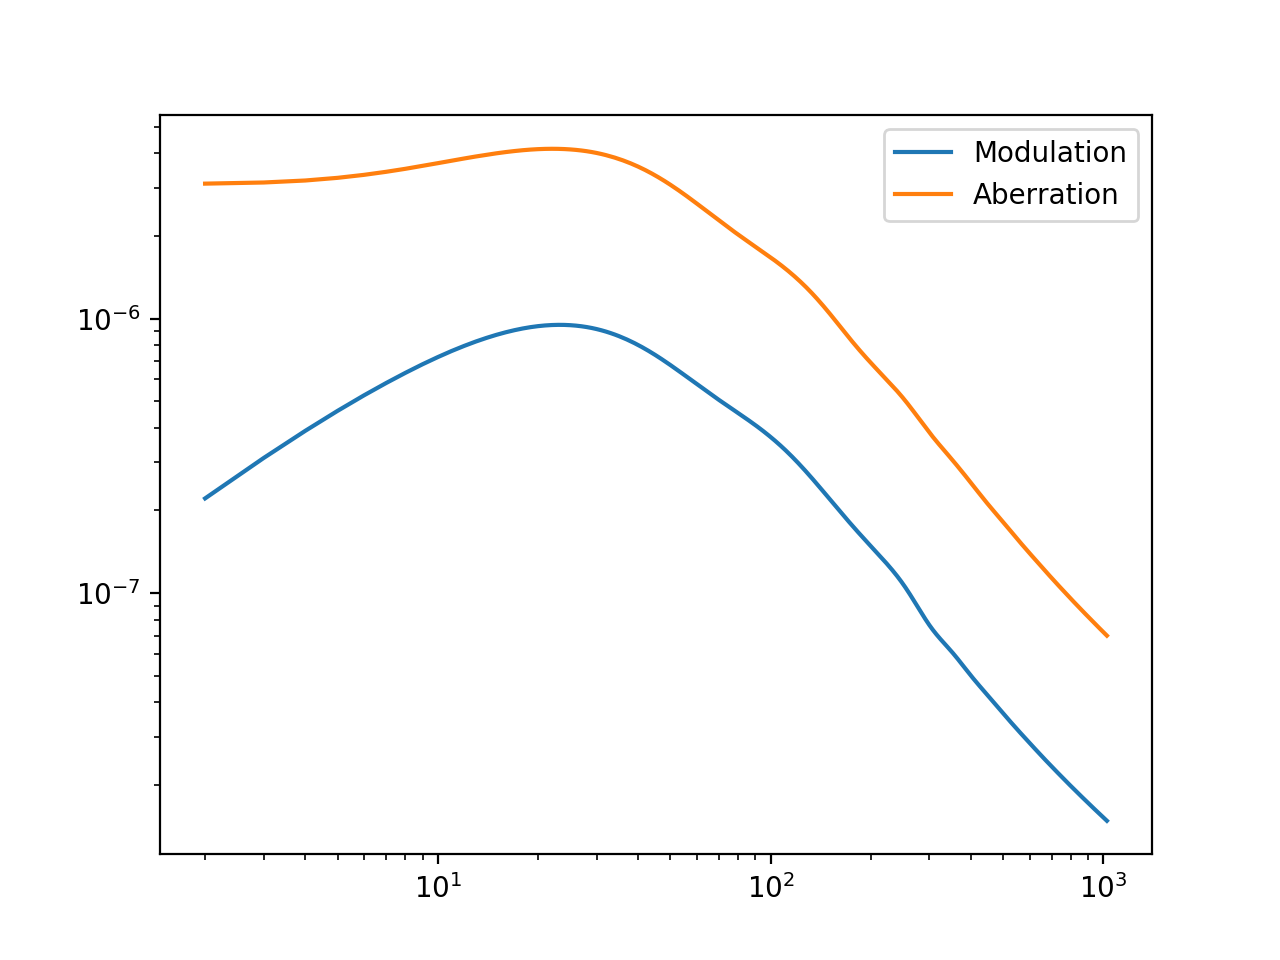

In [44]:
figure()
plot(fct.ell,cl_mod[2:fct.lmax+1]*2.*pi/(fct.ell*(fct.ell+1.)),label="Modulation")
plot(fct.ell,cl_abr[2:fct.lmax+1]*2.*pi/(fct.ell*(fct.ell+1.)),label="Aberration")
loglog()
legend(loc=0)

In [12]:
fct.cls.keys()

['W1xW1',
 'W1xW10',
 'W1xW2',
 'W1xW3',
 'W1xW4',
 'W1xW5',
 'W1xW6',
 'W1xW7',
 'W1xW8',
 'W1xW9',
 'W3xW10',
 'W3xW2',
 'W3xW3',
 'W3xW4',
 'W3xW5',
 'W3xW6',
 'W3xW7',
 'W3xW8',
 'W3xW9',
 'W5xW10',
 'W5xW2',
 'W5xW4',
 'W5xW5',
 'W5xW6',
 'W5xW7',
 'W5xW8',
 'W5xW9',
 'W7xW10',
 'W7xW2',
 'W7xW4',
 'W7xW6',
 'W7xW7',
 'W7xW8',
 'W7xW9',
 'W9xW10',
 'W9xW2',
 'W9xW4',
 'W9xW6',
 'W9xW8',
 'W9xW9']

In [20]:
cdc.cross_doppler_forecast?

In [21]:
adc.auto_doppler_forecast?